/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5193 - loss: 0.7073 - val_accuracy: 0.4625 - val_loss: 0.7012
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5462 - loss: 0.6924 - val_accuracy: 0.4688 - val_loss: 0.6976
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5196 - loss: 0.6856 - val_accuracy: 0.4688 - val_loss: 0.6934
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5922 - loss: 0.6767 - val_accuracy: 0.4688 - val_loss: 0.6918
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6031 - loss: 0.6669 - val_accuracy: 0.5125 - val_loss: 0.6930
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6044 - loss: 0.6656 - val_accuracy: 0.5063 - val_loss: 0.6912
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6260 - loss: 0.6638 - val_accuracy: 0.5312 - val_loss: 0.6894
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6019 - loss: 0.6635 - val_accuracy: 0.5250 - val_loss

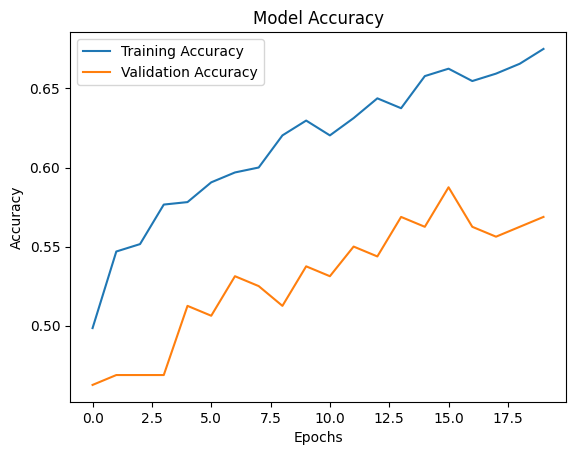

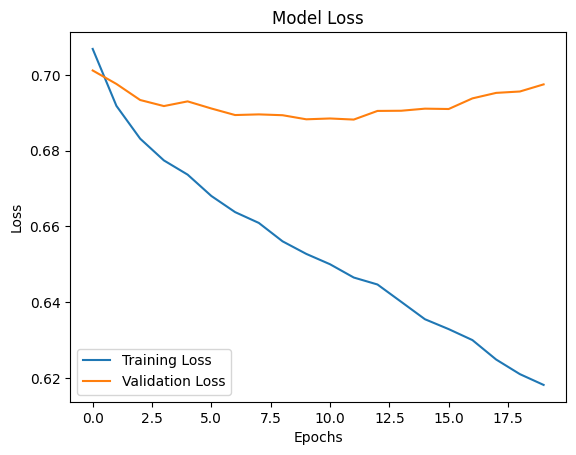

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


np.random.seed(42)
data_size = 1000
features = 10


X = np.random.rand(data_size, features)
y = np.random.randint(0, 2, data_size)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(features,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.2f}')


y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [2]:
# prompt: show me the above used dataset

import pandas as pd
print(pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(features)]))
print(pd.DataFrame(y, columns=["Target"]))


     Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0     0.374540   0.950714   0.731994   0.598658   0.156019   0.155995   
1     0.020584   0.969910   0.832443   0.212339   0.181825   0.183405   
2     0.611853   0.139494   0.292145   0.366362   0.456070   0.785176   
3     0.607545   0.170524   0.065052   0.948886   0.965632   0.808397   
4     0.122038   0.495177   0.034389   0.909320   0.258780   0.662522   
..         ...        ...        ...        ...        ...        ...   
995   0.512429   0.672714   0.387131   0.251308   0.166201   0.349474   
996   0.588086   0.570690   0.484266   0.549979   0.491791   0.565456   
997   0.066628   0.976080   0.956992   0.060437   0.443253   0.186245   
998   0.353906   0.603326   0.312001   0.909824   0.870400   0.558232   
999   0.450383   0.325133   0.471110   0.818738   0.124614   0.857656   

     Feature_6  Feature_7  Feature_8  Feature_9  
0     0.058084   0.866176   0.601115   0.708073  
1     0.304242   0.5247